In [58]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [87]:
def disp(x,y):
    plt.scatter(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Dimentionality Reduction

https://classroom.udacity.com/courses/ud120/lessons/2962298545/concepts/30669485620923

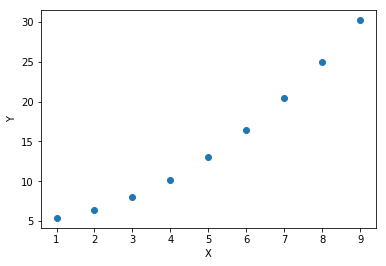

In [92]:
y = [.3*i**2 + 0.1 *i + 5 for i in x] 
disp (x,y)

*2-D*. the scale on $Y$ axis is different, even though the data looks like a line on the plot it is not

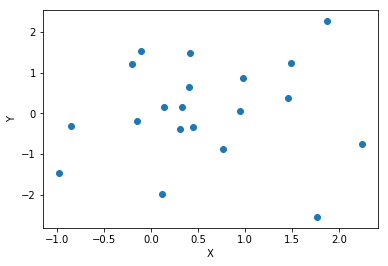

In [105]:
rng = np.random.RandomState(0)
x = rng.randn(20)
y = rng.randn(20)
disp(x,y)

*2-D*

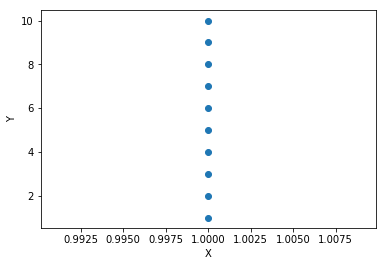

In [108]:
x = np.ones(10)
y = [i+j for i,j in enumerate(x) ]
disp(x,y)

*1-D* Because $X$ is constant and only $Y$ is varying

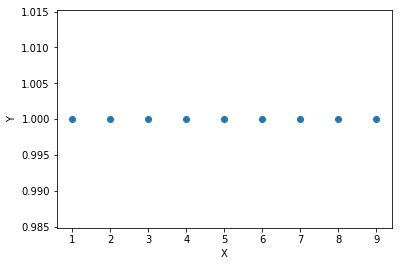

In [152]:
x = np.arange(1,10)
y = np.ones(x.shape[0])
disp(x,y)

*1-D*. Here in the above plot $Y$ is constant and it is varying only in $X$ direction hence *1-D*

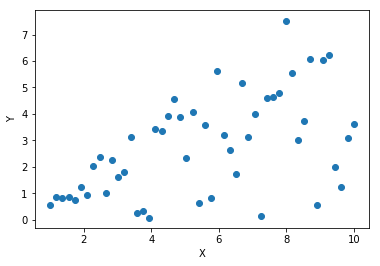

In [129]:
np.random.seed(0)
x = np.linspace(1, 10, 50)
y = x * np.random.random(50)
disp(x,y)

*2-D*

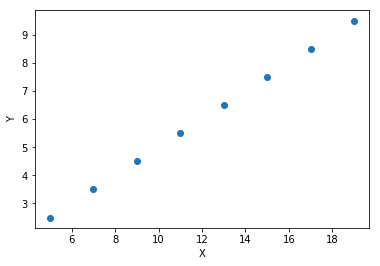

In [157]:
x = np.arange(5,20,2)
y = 0.5*x
disp(x,y)

*1-D*. This is surprzingly a $1-D$ data. Because if we rotate the $X$-axis by $60\,^{\circ}$ all the points line up nicely on $X$-axis

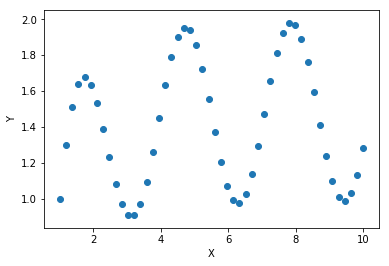

In [136]:
np.random.seed(0)
x = np.linspace(1, 10, 50)
y = np.sin(x)**2 + np.cos(1/x)**2
disp(x,y)

*2-D*

## PCA (Principal Component Analysis)

PCA always finds a new co-ordinate systems by tanslation and rotation of the axis. 
In the direction of Principal component there is always a more deviation in data. And there will be less differences/variance in data.

## Measurable and Latent Feature

Suppose we have a list of house listed in an area for sale. We have the following four infomation available with us.

* Square foot of House
* Number of Bed rooms in the house.
* School Rankings near the house
* Neighbour hood rating of the area.

|Measurable| Latent|
|----------|-------|
|Square foot| Size|
|# of bed rooms|Size|
|School Rankings| Neighbourhood|
|Neighbour hood|Neighbourhood|

### Measurable Features:
Any features which is physically measurable by some means. in the above example 
* Sq foot
* \# of Bed rooms.
which can be measured in some units.

Similarly the school rating and the neighbour hood ratings are calculated based on some huristics.

### Latent Features:

Latent features are derived out of the "Measurable features". Here in our example

* Sq foot
* \# of Bed rooms.

Both of the above features gives the estimate of how big or small the house will be. In other words it gives the idea about the "Size" of the house. As we can see we can derive the "Size" information about the house is derived out of 2 measurable features.

## Peserving Information:

In our example of house listed for sale, Best way to condense our 4 feature to 2, so that we really get to the heart of the infomation.

* There are many features, but only a small number of features are actually driving the patterns.
* Try making a "Composit feature" aka PC feature that more directly probes the underlying phenomenon


Principal component of a dataset is the direction that has "Largest Variance" or It has maximum amount of "Information" from the original data.

## Review of PCA

* Systamatic way of transorming input features in to principal components.
* Use Principal component as new features.
* Principal components (PCs) are the direction in the data, that, maximizes the "Variance"  OR minimizes the "Information loss", when projected/compressed down on an axis or plain.
* More variance of data along PCs. Higher that PC's is ranked.
* Most variance or Most Information is the 1st PC.
* Second most variance is 2nd PC.
* Max number of PCs is equal to the number of features. 
* PC's are orthogonal to each other

## When to use PCA?

* Latent features driving the pattern in the data.
* Dimentionality reduction
* Visualization of higher dimentional data.
* To reduce noise in the data.
* Using PCA as pre-processing method to reduce the dimentionality before feeding it to the next classification/Regression algoithms
    

In [2]:
from time import time
import logging
import pylab as pl
import numpy as np

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

 Display progress logs on stdout


In [5]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [7]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)


In [9]:
n_samples, h, w

(1288, 50, 37)

In [11]:
type(lfw_people)

sklearn.utils.Bunch

In [12]:
lfw_people.data

for machine learning we use the data directly (as relative pixel
position info is ignored by this model)


In [13]:
X = lfw_people.data
n_features = X.shape[1]


In [14]:
X.shape

(1288, 1850)

In [15]:
50*37

1850

the label to predict is the id of the person

In [16]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [25]:
print( 'Total dataset size:')
print(f'n_samples: {n_samples}')
print (f'n_features: {n_features}')
print (f'n_classes: {n_classes}')

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Split into a training and testing set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
dataset): unsupervised feature extraction / dimensionality reduction


In [28]:
n_components = 150

In [29]:
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

/home/santhosh/miniconda3/envs/py37_django/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print( "Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



/home/santhosh/miniconda3/envs/py37_django/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Projecting the input data on the eigenfaces orthonormal basis


In [33]:
pca.components_[0]

array([-9.6820495e-06, -1.0635604e-05, -1.2983677e-05, ...,
       -2.0258427e-05, -1.8286042e-05, -1.6789792e-05], dtype=float32)

In [43]:
pca.singular_values_[0], pca.singular_values_[1]

(21997.025, 19444.318)

In [38]:
X_train_pca.

<function ndarray.all>

In [46]:
pca.explained_variance_[0], pca.explained_variance_[1]

(501418.78, 391794.3)

In [47]:
type(pca.explained_variance_)

numpy.ndarray

In [57]:
pca.explained_variance_

array([501418.78   , 391794.3    , 183593.     , 154257.03   ,
       133670.77   ,  74828.57   ,  65169.77   ,  56409.08   ,
        52337.727  ,  49298.773  ,  43599.164  ,  40965.543  ,
        31706.82   ,  28196.883  ,  27588.19   ,  25390.389  ,
        23128.941  ,  22155.639  ,  21659.742  ,  18729.08   ,
        18053.488  ,  16946.477  ,  16575.896  ,  14548.037  ,
        13765.094  ,  13481.158  ,  13152.335  ,  12549.579  ,
        11496.769  ,  10829.159  ,  10203.871  ,   9893.454  ,
         9228.008  ,   9102.1875 ,   8670.791  ,   8550.802  ,
         8154.2354 ,   7677.137  ,   7519.378  ,   7378.8833 ,
         7256.7974 ,   6934.103  ,   6735.531  ,   6696.656  ,
         6243.76   ,   6193.622  ,   6100.427  ,   5767.8022 ,
         5636.475  ,   5612.366  ,   5417.1904 ,   5322.855  ,
         5193.3867 ,   5114.921  ,   5022.138  ,   4891.0654 ,
         4668.076  ,   4634.3994 ,   4529.633  ,   4483.062  ,
         4292.1694 ,   4220.4653 ,   4076.6619 ,   3973

In [56]:
len(pca.explained_variance_ratio_)

150